<a href="https://colab.research.google.com/github/fernandarrios/desafio.cinemaeliteratura/blob/main/Filme_e_Literatura.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Uma breve história do cinema

O início da história do cinema é incerto, mas a primeira exibição paga registrada de um filme foi em 28 de dezembro de 1895, no parisiense Salão Grand Café. O curta exibido era *L'Arrivée d'un Train à La Ciotat* dos irmãos Lumière. No dia, pouco mais de 30 pessoas foram.


Completamente revolucionário na época, *L'Arrivée d'un Train à La Ciotat* provocou efeitos de êxtase e medo na platéia, pois elas acharam que o trem ia sair da tela, fazendo com que diversas pessoas ficassem com medo e fazendo outras irem embora.

O sucesso foi tanto que cada dia mais apareciam pessoas para verem o filme, tornando-os pioneiros. Porém, eles não reivindicaram para si a invenção de tal feito.

<img src="https://segredosdomundo.r7.com/wp-content/uploads/2021/04/irmaos-lumiere-quem-foram-historia-dos-pais-do-cinema.jpg" width="600">Imãos Lumière

Como ainda não conseguiam casar a imagem com um som sincronizado, os 30 primeiros anos da história do cinema foram marcados com filmes que eram praticamente silenciosos, acompanhados muitas vezes de música ao vivo, efeitos especiais, sendo *George Méilès* o pioneiro de alguns deles, além de narração e diálogos escritos presentes entre as cenas.

<img src="https://super.abril.com.br/wp-content/uploads/2005/06/o-macc81gico-dos-filmes.png" width="600">Viagem à lua de George Meilès


<img src="https://i.pinimg.com/originals/4e/40/09/4e400994aabaafa61d6e0c09193c8062.jpg" width="600">Exemplo de diálogo de filme mudo

Desde esse fátidico dia, milhões de pessoas riem, choram, se emocionam com os filmes lançados todos os dias, filmes baseados nos super-heróis, como o universo DC, passando pelos documentários, como Trabalho Interno do *Charles Ferguson* sobre o *crash* da bolsa de imóveis de 2008 nos EUA, dramas como <i>Her</i> e a lista vai assim se tornando longa, com gêneros que agradam diversos gostos, desde à pessoa mais exigente até a menos.

Com essa infinidade de possibilidades, me perguntei quais filmes já vi durante meus 23 anos, e algumas características da ficha técnica deles.

Essa pergunta irei responder nesse momento.


###Importando os dados necessários para realizar a análise de dados.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly as py
import plotly.graph_objs as go

Desde 2013, quando eu conheci o site de marcação de filmes [Filmow](https://filmow.com/), venho catalogando os filmes que eu vi antes de 2013 e a partir desse ano. Por conta disso, decidi usar o meu dataset para responder algumas dúvidas que tenho, como: Qual a nota que eu mais dou? Quantos diretores e diretoras eu já vi?

In [2]:
df_movie = pd.read_csv('https://raw.githubusercontent.com/fernandarrios/desafio.cinemaeliteratura/main/dataset_desafioshepy/Filmes%20e%20Livros%20-%20Filmes.csv')

###Análise exploratória do *dataframe*

In [3]:
df_movie.head()

,Ano,Título,Título original,Diretor(a),Gênero,País,Visto em,Nota
0,2013,Como não perder essa mulher,Don Jon,Joseph Gordon-Levitt,Homem,EUA,-,2.5
1,2002,Planeta do Tesouro,Treasure Planet,John Musker; Ron Clements,Homem,EUA,-,4
2,2003,Doze é demais,Cheaper by the dozen,Adam Shankman,Homem,EUA,-,2.5
3,2005,Doze é demais 2,Cheaper by the dozen 2,Adam Shankman,Homem,EUA,-,3
4,2002,Um amor para recordar,A walk to remember,Adam Shankman,Homem,EUA,-,2


Como podemos perceber, o *dataframe* contém os seguintes dados: ano de lançamento, título, título original, diretor(a), gênero do(a) diretor(a), país, ano em que foi visto e a nota que eu dei de 0 a 5.

Qual será o tipo de cada dado?

In [4]:
df_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1546 entries, 0 to 1545
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Ano              1546 non-null   object
 1   Título           1546 non-null   object
 2   Título original  1546 non-null   object
 3   Diretor(a)       1546 non-null   object
 4   Gênero           1546 non-null   object
 5   País             1546 non-null   object
 6   Visto em         1546 non-null   object
 7   Nota             1541 non-null   object
dtypes: object(8)
memory usage: 96.8+ KB


###Pré-processamento

Agora vamos limpar dos dados, eliminando os que não precisamos e qualquer inconsistência que aparecer.

In [5]:
# Dropando as colunas que não irei utilizar
df_movie = df_movie.drop(['Título original', 'Visto em'], axis=1)

Eliminei a coluna 'Título Original' pois apresenta títulos com o alfabeto não latino, como o alfabeto japonês e alfabeto russo. E o 'Visto em' por razão da presença de nulos e que não irei utilizar os dados nele contido.

In [6]:
# Consertando as inconsistência
df_movie.loc[df_movie['Gênero']== '-']
df_movie.drop(940, inplace=True)

df_movie['Gênero'].replace('Homem ','Homem', inplace=True)
df_movie['Gênero'].replace('Mulher ','Mulher', inplace=True)

In [7]:
df_movie.loc[df_movie['Ano']== '-']
df_movie.drop(843, inplace=True)

In [8]:
#Agora irei passar "Homem", "Mulher" e "Ambos" para inglês
df_movie['Gênero'].replace('Homem','Man', inplace=True)
df_movie['Gênero'].replace('Mulher','Woman', inplace=True)
df_movie['Gênero'].replace('Ambos','Both', inplace=True)

In [9]:
#Padronizando a pontuação das notas para que sejam reconhecidas como dado numérico do tipo float
df_movie['Nota'] = df_movie['Nota'].apply(lambda x: str(x).replace(',','.'))
df_movie['Nota'] = df_movie['Nota'].astype('float64')

df_movie['Ano'] = df_movie['Ano'].astype('float64')

In [10]:
#Depois que reconhecer como tipo float, substituí pela sua média
df_movie.loc[df_movie['Nota'] > 100, 'Nota'] = df_movie['Nota'].mean()

In [11]:
df_movie.rename(columns={
    'Ano':'Year',
    'Título ':'Title',
    'Diretor(a)':'Director',
    'Gênero':'Gender',
    'País':'Country',
    'Nota':'Rate'
}, inplace=True)

Mudando os nomes das colunas para que fiquem na língua mais utilizada e eliminando os caracteres especiais como o acento agudo.

###Análise dos dados

####Sou Exigente?

Não me considero exigente em relação a filmes, mas será que estou certa? Vamos descobrir neste momento.

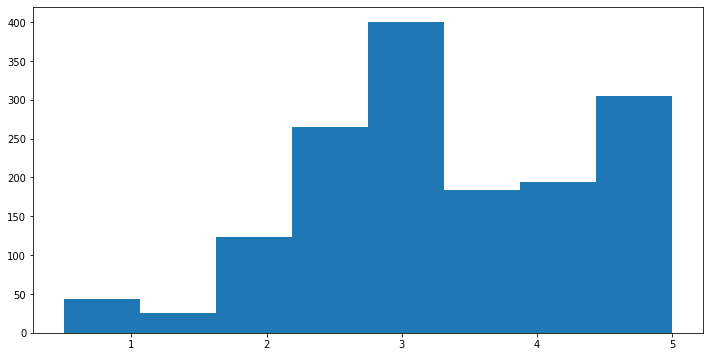

In [12]:
plt.figure(figsize=(12, 6))
plt.hist(df_movie['Rate'], bins=8)
plt.show()

Como podemos perceber, a nota que eu mais dou é 3, logo em seguida é 5. É, talvez eu seja um pouco exigente, ficando nos extremos de ou eu não gosto muito ou eu amo, preciso trabalhar melhor com meu meio termo.

#### De qual país eu consumo mais conteúdo audiovisual?

O meio que eu mais consumia filmes até meus 15 anos, era pela televisão, com o programa Sessão da tarde, logo não tinha o poder de escolha do filme.

Além disso, eu só podia mexer no computador nos finais de semana e ainda tinha que dividir com minha irmã, então optava por fazer outras coisas do que ver filme. Depois disso, quando ganhei meu primeiro notebook com 15 anos, comecei a ter maior tempo no computador, vendo qualquer filme que eu me deparava.

Quando amadureci, comecei a questionar o conteúdo que estava consumindo, se era diverso, produzido fora do eixo Estados Unidos da América(EUA)-Europa, quem eram os diretores, se estava consumindo diretoras também. Esperamos que esse conteúdo diverso chegue até nós de forma passiva, mas se não fizermos um esforço consciente, essa mudança não irá acontecer.

Desde então venho explorando Nollywood, Bollywood, filmes asiáticos. Mas será que mudei drátiscamente ou ainda preciso mudar mais?

Vamos então analisar os 10 países que mais consumo mídia visual.

In [13]:
df_countries_topten = df_movie['Country'].value_counts()[:10]

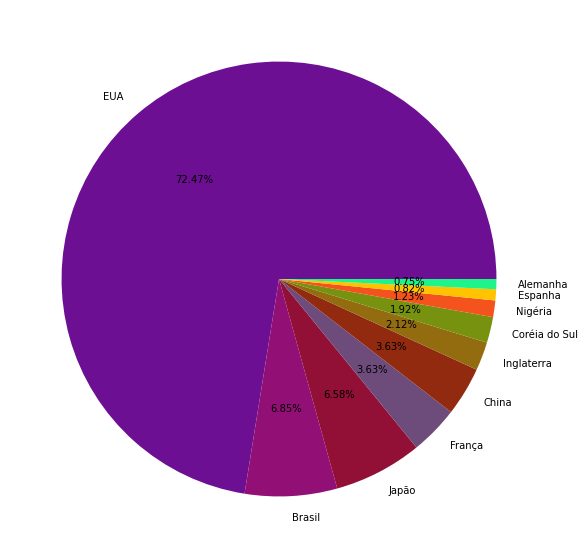

In [14]:
c = ['#6c0f92', '#920f76', '#920f35', '#6d4c7b', '#922a0f', '#926c0f', '#77920f', '#f4531d', '#FFC300', '#1df489' ]
plt.figure(figsize=(10, 10))
plt.pie(df_countries_topten.values, 
        labels=df_countries_topten.index, 
        autopct='%1.2f%%', 
        colors=c, 
        textprops={'fontsize':10})
plt.show()

Como pude perceber com o gráfico, o país que eu mais consumo conteúdo é o EUA com 72.48%, seguido pelo Brasil com 6.84% e Japão com 6.57%. Ainda tenho um longo caminho a pecorrer.

#### De quais diretores eu mais assisti filmes?

Depois que tomei a decisão de diversificar meus filmes, passei a escolhê-los com os seguintes critérios:

- País do filme;

- Diretor;

- Gênero do diretor;

Vimos anteriormente que o país do qual eu mais consumo conteúdo é o EUA. Mas quem são os 10 diretores que eu mais vi sua obra? E quantos deles são homens?

In [15]:
df_director_topten = df_movie['Director'].value_counts()[:10]

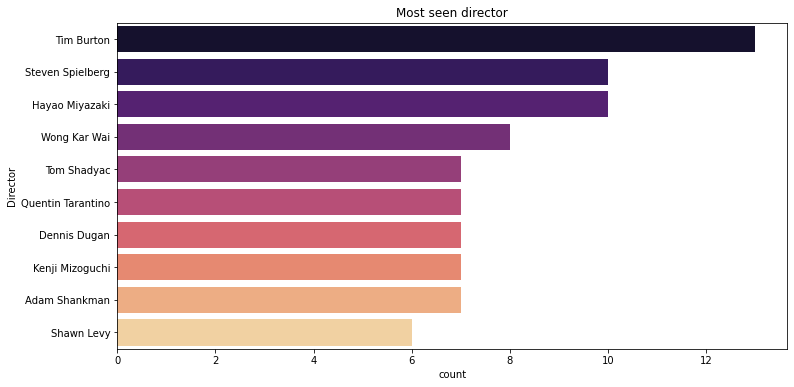

In [16]:
plt.figure(figsize=(12,6))
sns.countplot(y='Director',
              data = df_movie,
              palette = 'magma',
              order = df_director_topten.index).set_title('Most seen director')
plt.show()

In [17]:
df_director_gender = df_movie['Gender'].value_counts()

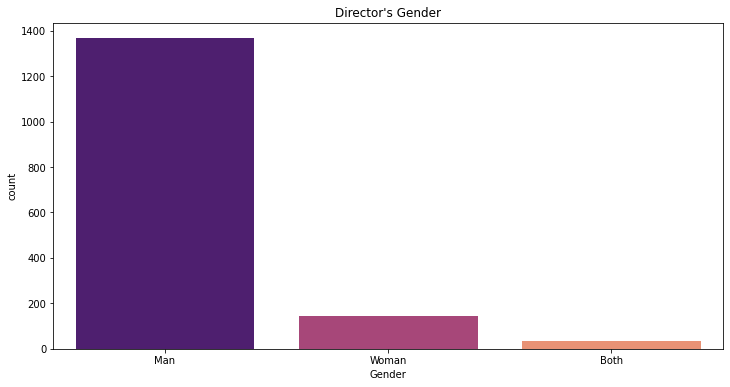

In [18]:
plt.figure(figsize=(12,6))
sns.countplot(x='Gender',
              data = df_movie,
              palette = 'magma',
              order = df_director_gender.index).set_title("Director's Gender")

plt.show()

Hayao Miyazaki só não é primeiro porque não sobrou filmes dos Studio Ghibli para ver, mas preciso me atentar mais para as diretoras, não é mesmo?

####Ano vs Nota

Filmes antigos, ver efeitos que hoje em dia estão ultrapassados mas antigamente eram revolucionários. Ver o primeiro filme a colocar a música "tun tun" para indicar que tem um tubarão próximo a atacar. Quanto mais consciente sobre as escolhas do filmes eu ficava, mais filmes antigos eu via e gostava, mas será que o ano do filme influência realmente minha nota? Vamos ver.

In [19]:
corr = df_movie.loc[:, 'Year': 'Rate'].corr()
corr

,Year,Rate
Year,1.000000,-0.037312
Rate,-0.037312,1.000000


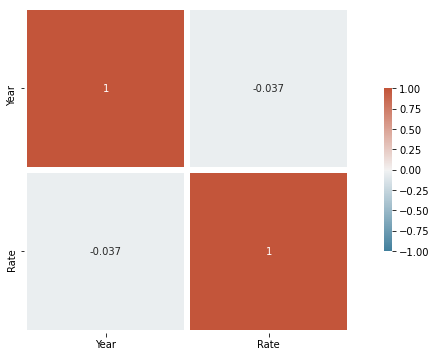

In [20]:
plt.figure(figsize=(12,6))
cmap = sns.diverging_palette(230, 20, as_cmap = True)
sns.heatmap(corr, cmap=cmap, center=0, vmin=-1, vmax=1, annot=True, square=True, linewidths=5, cbar_kws={'shrink': 0.5})
plt.show()

Pelo que podemos perceber, o ano do filme não tem correlação com a nota que eu dou. Confesso que fiquei surpresa.

## Uma breve história dos livros 

A história do livro é tão antiga quanto a história da escrita. Desde 6 mil anos atrás já surgiam os primeiros escritos, como o uso do papiro, pergaminho, placas e o formato que perdura até os dias atuais, o códex.



<img src="https://3.bp.blogspot.com/-8y01Mnf6I4A/UI5jabcXrNI/AAAAAAAATw0/wfj5xln8GSY/s1600/livro+pergaminho+em+rolo+e+imprensa+de+gutembergh.gif" width="600">Exemplo de pergaminho (lado esquerdo) e códice (lado direito)

Na Idade Média, os livros eram considerados objetos de intenso valor e, por isso, acessível somente para a nobreza e o clero, tornando-o um objeto cobiçado e motivo de exibição e furto.

Além disso, muitos livros eram considerados impróprios pela Igreja Católica, sendo denominados *Index Librorum Prohibitorum* ou "Índice dos Livros proibidos".

Em meados do século XV, o alemão *Joanes Gutenberg* (1398-1468), desenvolveu a prensa, e graças a ele hoje em dia eu posso ler meus livros em meus momentos de descontração.


<img src="https://cdn.falauniversidades.com.br/wp-content/uploads/2020/09/24123139/Prensa-de-Guttenberg.jpg" width="600">Ilustração da prensa de Gutenberg


 

Catalogo meus livros no site [Skoob](https://www.skoob.com.br/) e como criei o hábito de leitura apenas com 13 anos, após comprar meu primeiro livro "Piores Inimigas/Melhores Amigas", da série Garotas da Rua Beacon da *Annie Bryant*, tenho todos eles registrados.

Até mais que filmes, livros são minha paixão e não consigo imaginar um dia sequer sem ler algum, mas nunca parei para analisá-los a fundo. Mas todo dia é dia de fazer algo diferente, não é mesmo?

###Importando o *dataset*

In [21]:
df_book = pd.read_csv("https://raw.githubusercontent.com/fernandarrios/desafio.cinemaeliteratura/main/dataset_desafioshepy/Filmes%20e%20Livros%20-%20Livros%20Lidos.csv")

###Análise exploratória do *dataframe*

In [22]:
df_book.head()

,TÍTULO,TÍTULO ORIGINAL,AUTOR,TRADUTOR(A),GÊNERO,PAÍS,LIDO EM,NOTA,FORMATO,PÁGINAS,EDITORA,TAG
0,O nervo da noite,O nervo da noite,João Gilberto Noll,-,Homem,Brasil,-,2,Livro,48,Scipione,físico
1,Estrelas Tortas,Estrelas Tortas,Walcyr Carrasco,-,Homem,Brasil,-,5,Livro,104,Moderna,físico
2,A marca de uma lágrima,A marca de uma lágrima,Pedro Bandeira,-,Homem,Brasil,-,5,Livro,184,Moderna,físico
3,Amanhecer,Breakdawn,Stephenie Meyer,NaN,Mulher,EUA,-,2,Livro,567,Intrínseca,físico
4,Para sempre,Evermore,Alyson Noel,NaN,Mulher,EUA,-,3,Livro,255,Intrínseca,físico


Como podemos ver, o *dataframe* apresenta os seguintes dados: Título, Título original, Autor, Tradutor(a), Gênero, País, Lido em, Nota(de 0 a 5), Formato(se é livro, história em quadrinhos ou mangá), Páginas, Editora e Tag(se foi lido em formato físico ou ebook).

Qual será o tipo de cada dado?

In [23]:
df_book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463 entries, 0 to 462
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   TÍTULO           463 non-null    object
 1   TÍTULO ORIGINAL  463 non-null    object
 2   AUTOR            463 non-null    object
 3   TRADUTOR(A)      83 non-null     object
 4   GÊNERO           463 non-null    object
 5   PAÍS             463 non-null    object
 6   LIDO EM          463 non-null    object
 7   NOTA             463 non-null    object
 8   FORMATO          463 non-null    object
 9   PÁGINAS          463 non-null    int64 
 10  EDITORA          463 non-null    object
 11  TAG              463 non-null    object
dtypes: int64(1), object(11)
memory usage: 43.5+ KB


###Pré-processamento

Agora vamos limpar dos dados, eliminando os que não precisamos e qualquer inconsistência que aparecer.

In [24]:
#Dropando as colunas que não irei utilizar
df_book = df_book.drop(['TÍTULO ORIGINAL', 'TRADUTOR(A)', 'LIDO EM'], axis=1)

Eliminei a coluna 'Título Original' pois apresenta títulos com o alfabeto não latino. E o 'Tradutor(a)' e 'Lido em' por razão da presença de nulos e que não irei utilizar os dados neles contidos.

In [25]:
#Padronizando a pontuação das notas para que sejam reconhecidas como dado numérico do tipo float
df_book['NOTA'] = df_book['NOTA'].apply(lambda x: str(x).replace(',','.'))
df_book['NOTA'] = df_book['NOTA'].astype('float64')



In [26]:
#Renomeando alguns dados que irão aparecer e é interessante alterá-los para inglês
df_book['GÊNERO'].replace('Homem','Man', inplace=True)
df_book['GÊNERO'].replace('Mulher','Woman', inplace=True)
df_book['GÊNERO'].replace('Ambos', 'Both', inplace=True)

df_book['FORMATO'].replace('Livro', 'Book', inplace=True)
df_book['FORMATO'].replace('HQ', 'Comic Book', inplace=True)
df_book['FORMATO'].replace('Mangá', 'Manga', inplace=True)

df_book['TAG'].replace('físico', 'Book', inplace=True)

In [27]:
df_book.rename(columns={
    'TÍTULO':'Title',
    'AUTOR':'Author',
    'GÊNERO':'Gender',
    'PAÍS':'Country',
    'NOTA':'Rate',
    'FORMATO':'Type',
    'PÁGINAS':'Page',
    'EDITORA':'Publisher',
    'TAG':'Tag'
}, inplace=True)

Mudando os nomes das colunas para que fiquem na língua mais utiizada e eliminando os caracteres especiais como o acento agudo.

###Análise de dados


####Sou Exigente?

Me considero exigente em relação aos livro, mas será que sou mesmo? Vamos descobir.

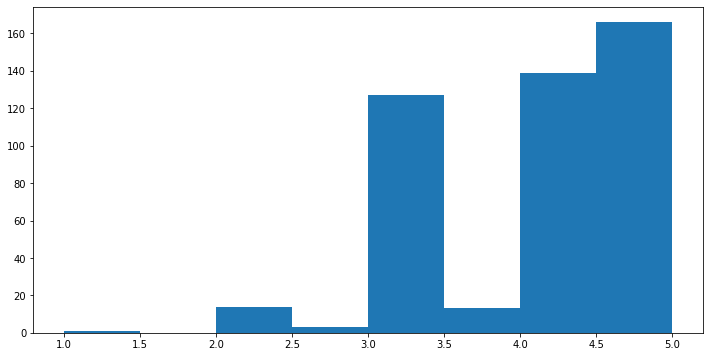

In [28]:
plt.figure(figsize=(12, 6))
plt.hist(df_book['Rate'], bins=8)
plt.show()

Bom, pelo que vimos as notas que eu mais dou é 5, depois 4.5. Sobre isso eu levanto duas hipóteses:

1.   Tenho um gosto muito bem definido de livros que eu sei qual é;
2.   Priorizo esse gosto, e saio pouco da minha zona de conforto;

Acabando a análise, vou procurar mais livros fora da minha zona de conforto.

####De qual país eu mais consumo a literatura?

De acordo com que fui me adentrando nas discussões sobre pautas sociais, comecei a prestar atenção à quem eu estava lendo, e percebi que o homem-branco estadunidense estava prevalecendo e para a escolha das minhas leituras serem de autores diversificados de forma natural, antes o esforço tem que ser consciente. Então comecei a priorizar a leitura das “minorias” e de diferentes países.

Será que fiz um progresso nesse quesito?

In [29]:
df_book_countrytopten = df_book['Country'].value_counts()[:10]

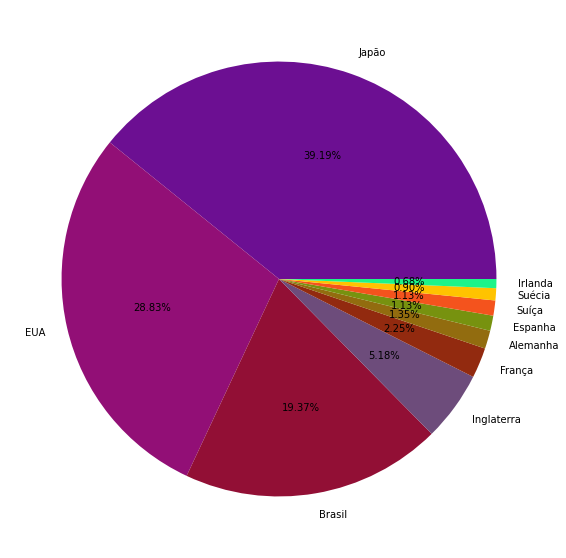

In [30]:
c = ['#6c0f92', '#920f76', '#920f35', '#6d4c7b', '#922a0f', '#926c0f', '#77920f', '#f4531d', '#FFC300', '#1df489' ]
plt.figure(figsize=(10, 10))
plt.pie(df_book_countrytopten.values, 
        labels=df_book_countrytopten.index, 
        autopct='%1.2f%%', 
        colors=c, 
        textprops={'fontsize':10})
plt.show()

Achei o resultado bastante interessante. Pelo visto o primeiro país que consumo conteúdo é o Japão com 39.19%, depois os EUA com 28.83% e em seguida o Brasil 19.37%.

Isso me deixou intrigada, qual será o formato mais lido?

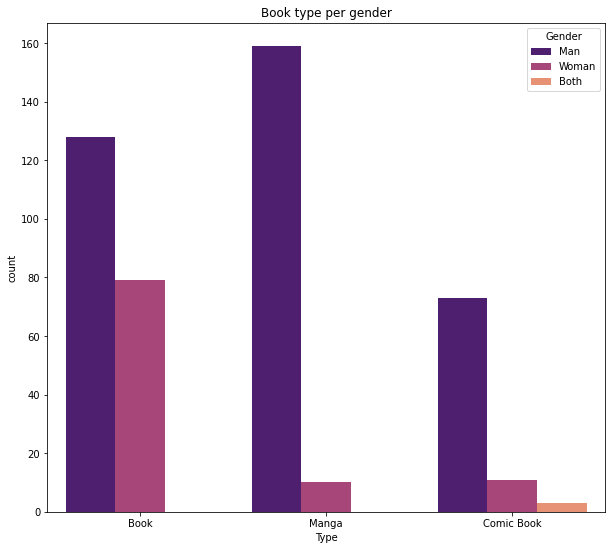

In [31]:
plt.figure(figsize=(10, 9))
sns.countplot(x='Type',
              palette="magma",
              hue='Gender', 
              data=df_book, 
              order=df_book['Type'].value_counts().index).set_title('Book type per gender')
plt.show()

Como podemos perceber, o Japão ficou com 39.19% pois consumo muito mangá, que é a grosso modo, história em quadrinhos japonês, seguido por livro e depois por história em quadrinhos. 

Outra informação interessante, é que como no caso dos filmes, consumo muito mais autores do que autoras. Shame on me.

####Físico ou ebook?

Confesso! Sou muito apegada a sensação do virar das folhas, sentir o progresso do livro ao abrir, quando se tem muito mais folhas na sua esquerda do que na direita, até a dor no braço dos calhamaços (haha), mas os *ebooks* vieram para ficar e realmente é muito cômodo ter 50 livros com o tamanho de um tablet na sua mochila.

Depois de comprar um *e-reader* há dois anos, quantos *ebooks* será que eu já li?



In [32]:
df_book_ebook = df_book['Tag'].value_counts()

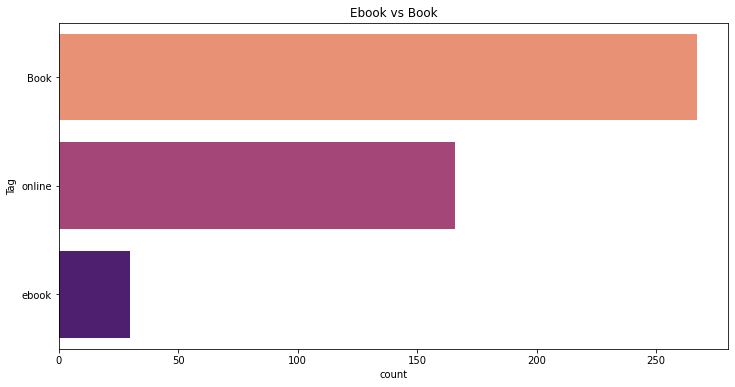

In [33]:
plt.figure(figsize=(12,6))
sns.countplot(y='Tag',
              data = df_book,
              palette = 'magma_r',
              order = df_book_ebook.index).set_title('Ebook vs Book')
plt.show()

Para uma saudosista dos livros físcos, considero que li até bastante ebook. E o que significa esse online? Eeerr...Pdfs

####Quantidade de páginas vs Nota

Será que a quantidade de páginas de um livro influência no quanto que eu vou gostar dele? porque se sim, já irei acrescentar esse critério para minha próxima leitura.

In [34]:
corr = df_book.loc[:, 'Rate': 'Page'].corr()
corr

,Rate,Page
Rate,1.000000,0.106972
Page,0.106972,1.000000


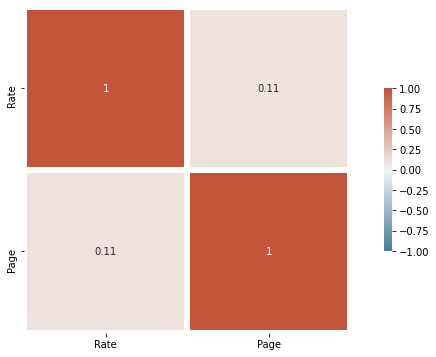

In [35]:
plt.figure(figsize=(12,6))
cmap = sns.diverging_palette(230, 20, as_cmap = True)
sns.heatmap(corr, cmap=cmap, center=0, vmin=-1, vmax=1, annot=True, square=True, linewidths=5, cbar_kws={'shrink': 0.5})
plt.show()

Pelo que podemos perceber, eles tem uma correlação fraca. Então posso continuar com a coleção vagalume para minhas próximas leituras.

##Juntando os dataframes para uma análise final

Depois de toda análise minuciosa de cada *dataframe*, gostaria de fazer um apanhado final dos países que eu mais consumo mídia. Então vamos lá.

In [36]:
df_total = pd.merge(df_movie, df_book, how='left', left_on=['Country'], right_on=['Country'])

In [37]:
df_total.head()

,Year,Title_x,Director,Gender_x,Country,Rate_x,Title_y,Author,Gender_y,Rate_y,Type,Page,Publisher,Tag
0,2013.0,Como não perder essa mulher,Joseph Gordon-Levitt,Man,EUA,2.5,Amanhecer,Stephenie Meyer,Woman,2.0,Book,567.0,Intrínseca,Book
1,2013.0,Como não perder essa mulher,Joseph Gordon-Levitt,Man,EUA,2.5,Para sempre,Alyson Noel,Woman,3.0,Book,255.0,Intrínseca,Book
2,2013.0,Como não perder essa mulher,Joseph Gordon-Levitt,Man,EUA,2.5,Os cientistas e seus experimentos de arromba,Mike Goldsmith,Man,2.0,Book,192.0,Cia das Letras,Book
3,2013.0,Como não perder essa mulher,Joseph Gordon-Levitt,Man,EUA,2.5,Leonardo da Vinci e seu super cérebro,Michael Cox,Man,2.0,Book,176.0,Cia das Letras,Book
4,2013.0,Como não perder essa mulher,Joseph Gordon-Levitt,Man,EUA,2.5,Pollyanna,Eleonor H. Porter,Woman,4.0,Book,80.0,Escala Educacional,Book


In [38]:
df_total_contries = df_total['Country'].value_counts()

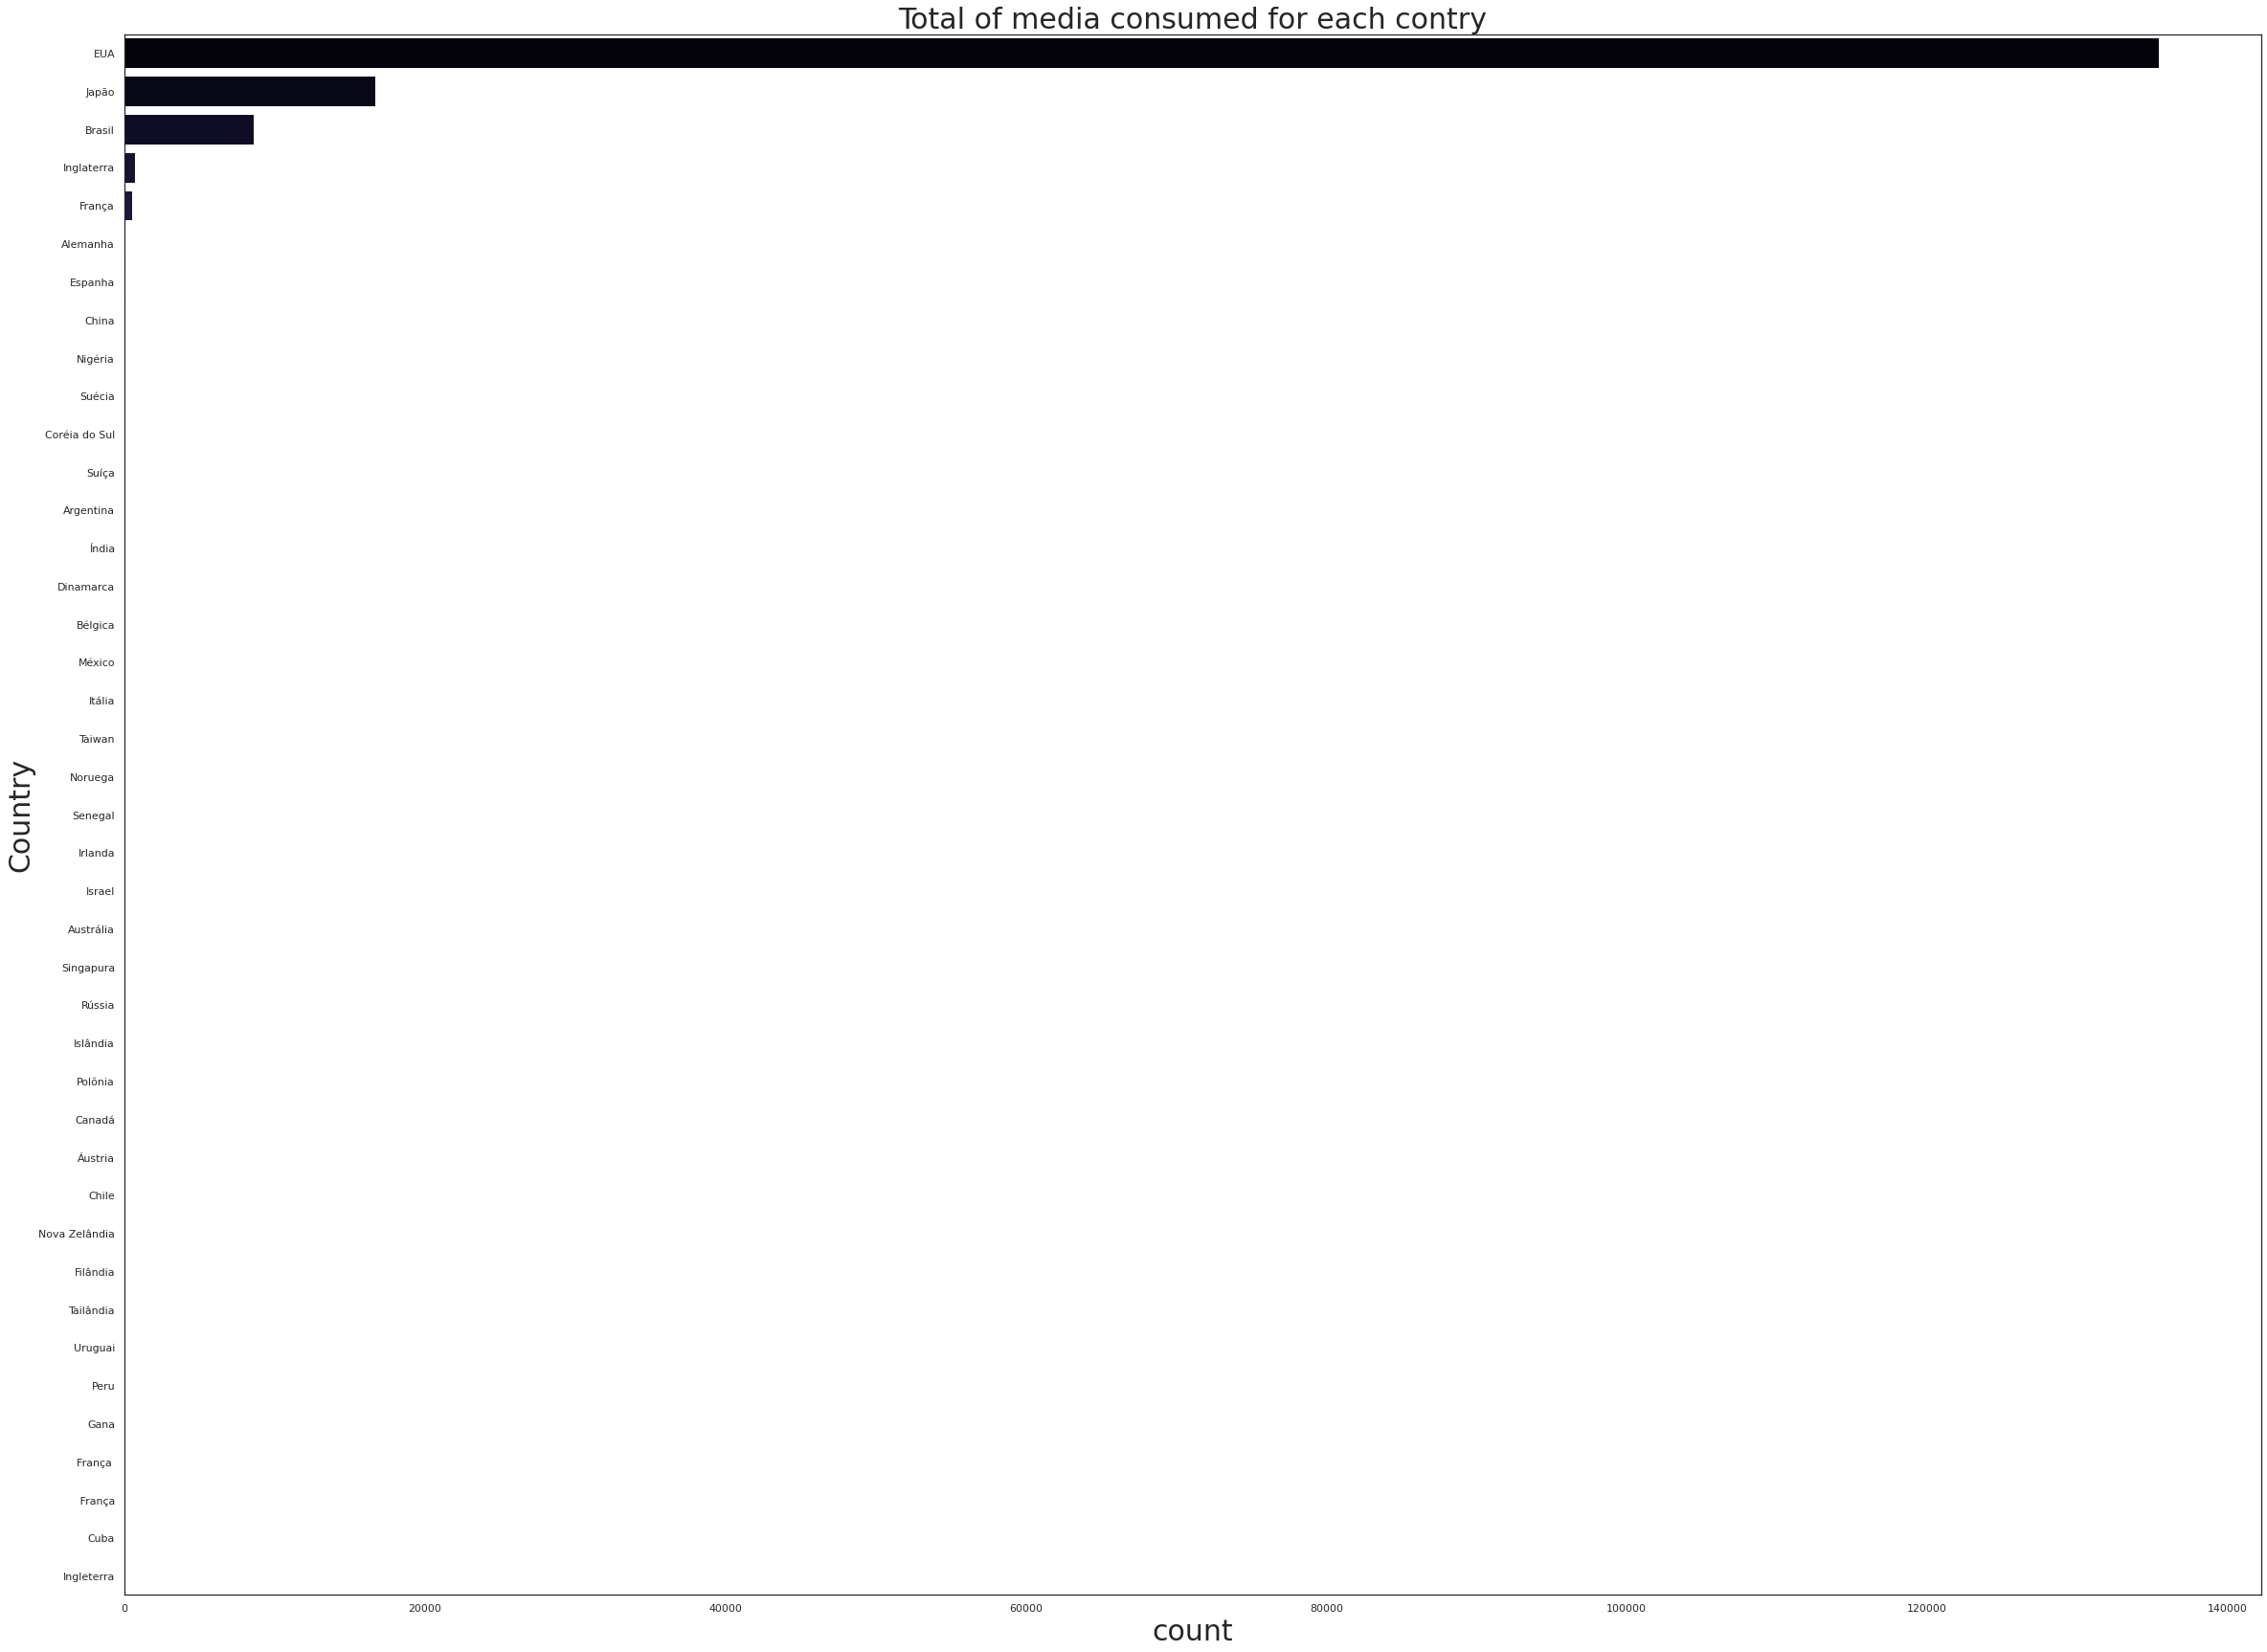

In [40]:
plt.figure(figsize=(40,30))
sns.countplot(y='Country',
              data = df_total,
              palette = 'magma',
              order = df_total_contries.index).set_title('Total of media consumed for each contry')
sns.set(rc={"font.size":40, "axes.titlesize":30,"axes.labelsize":30},style="white")
plt.show()
plt.show()

Pelo jeito ainda tenho um longo caminho a pecorrer..

##Referência:

**História da literatura**. Wikipédia, a enciclopédia livre. Disponível em: https://pt.wikipedia.org/wiki/Hist%C3%B3ria_da_literatura. Acesso em: 08 jun. 2021


DESCONHECIDO. **O início do cinema**. Noar Filmes. Disponível em: https://noarfilmes.com.br/lancamentos/o-inicio-do-cinema/. Acesso em: 06 jun. 2021

DIANA, Daniela. **História do livro**. Toda Matéria. Disponível em: https://www.todamateria.com.br/historia-do-livro/.  Acesso em: 07 jun. 2021 


**História do cinema**. Wikipédia, a enciclopédia livre. Disponível em: https://pt.wikipedia.org/wiki/Hist%C3%B3ria_do_cinema. Acesso em: 06 jun. 2021


###Documentação:

[Pandas](https://pandas.pydata.org/)

[Numpy](https://numpy.org/)

[Seaborn](https://seaborn.pydata.org/)

[Matplotlib](https://matplotlib.org/2.0.2/index.html)

##Para saber mais:

- PIONEIROS do Cinema | A história do cinema. Ep.01. [S. l.: s. n.] Publicado pelo canal Canto dos Clássicos. Disponível em: https://www.youtube.com/watch?v=7QbyYpLpnaQ. Acesso em: 06 jun. 2021

- KEMP, Philip. **Tudo sobre cinema.** Rio de Janeiro: Sextante, 2011. 

- DARNTON, Robert. “O que é a história do livro?”: revisitado. **ArtCultura**, Uberlândia, v. 10, n. 16, p. 155-169, jan.-jun. 2008.

- BENJAMIN, Walter. O narrador: considerações sobre a obra de Nikolai Leskov. In: ______. **Magia e técnica, arte e política**: ensaios sobre literatura e história da cultura. 3. ed. São Paulo: Brasiliense, 1987, p. 197-221. (Obras escolhidas; 1).

- OS narradores de Javé. Direção de Eliane Caffé. Rio de Janeiro: Riofilme, 2004. (100 min)  

- ROBERT Darton - 24/9/2012. [S. l.: s. n.] Publlicado pelo canal Roda Viva. Disponível em: https://www.youtube.com/watch?v=Eo3wTUimklU. Acesso em: 08 jun. 2021
